# Cluster Based Analysis for Patients without BB

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [234]:
import pandas as pd
data = pd.read_csv("/Users/joudsi/Desktop/17.07.19/subdata_not_bb_norm_clustered.csv")

In [235]:
data.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
0,0,0.488717,0.0,0.622181,0.513765,0.467144,0.682906,0.952925,0.495046,0.614398,...,0.419392,0.141012,0.003713,0.358974,0.181170,0.026126,0.053138,0.060837,2,0
1,1,0.857449,0.0,0.442255,0.419493,0.533017,0.526844,0.981238,0.316202,0.323825,...,0.419392,0.141012,0.026423,0.183761,0.167404,0.015823,0.041222,0.060837,0,1
2,2,0.593153,0.0,0.555505,0.481606,0.508564,0.585988,0.989232,0.462089,0.521004,...,0.428571,0.141012,0.001238,0.512821,0.095133,0.009494,0.014925,0.496198,0,1
3,3,0.599880,0.0,0.077902,0.448485,0.439401,0.344937,0.996756,0.188622,0.421801,...,0.419392,0.141012,0.007426,0.504274,0.086283,0.009494,0.027008,0.072243,0,0
4,4,1.000000,0.0,0.175903,0.355883,0.511169,0.557659,0.936510,0.400152,0.285158,...,0.419392,0.220588,0.026423,0.528846,0.119100,0.047468,0.103056,0.186312,0,1


In [236]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '6470')


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6470 entries, 0 to 6469
Data columns (total 30 columns):
Unnamed: 0          6470 non-null int64
amdission_age       6470 non-null float64
gender              6470 non-null float64
heartrate_mean      6470 non-null float64
meanbp_mean         6470 non-null float64
sysbp_mean          6470 non-null float64
tempc_mean          6470 non-null float64
spo2_mean           6470 non-null float64
resprate_mean       6470 non-null float64
diasbp_mean         6470 non-null float64
creatinine_mean     6470 non-null float64
potassium_mean      6470 non-null float64
sodium_mean         6470 non-null float64
chloride_mean       6470 non-null float64
bicarbonate_mean    6470 non-null float64
hematocrit_mean     6470 non-null float64
wbc_mean            6470 non-null float64
glucose_mean        6470 non-null float64
lactate_mean        6470 non-null float64
aniongap_mean       6470 non-null float64
albumin_mean        6470 non-null float64
bands_mean   

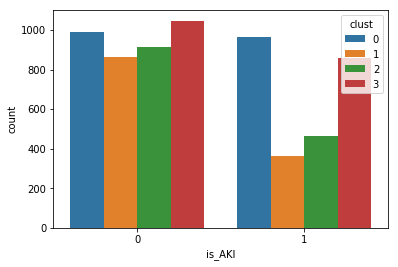

In [238]:
sns.countplot(x="is_AKI", hue="clust",data=data)

## LR Analysis C0

In [239]:
data.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
0,0,0.488717,0.0,0.622181,0.513765,0.467144,0.682906,0.952925,0.495046,0.614398,...,0.419392,0.141012,0.003713,0.358974,0.181170,0.026126,0.053138,0.060837,2,0
1,1,0.857449,0.0,0.442255,0.419493,0.533017,0.526844,0.981238,0.316202,0.323825,...,0.419392,0.141012,0.026423,0.183761,0.167404,0.015823,0.041222,0.060837,0,1
2,2,0.593153,0.0,0.555505,0.481606,0.508564,0.585988,0.989232,0.462089,0.521004,...,0.428571,0.141012,0.001238,0.512821,0.095133,0.009494,0.014925,0.496198,0,1
3,3,0.599880,0.0,0.077902,0.448485,0.439401,0.344937,0.996756,0.188622,0.421801,...,0.419392,0.141012,0.007426,0.504274,0.086283,0.009494,0.027008,0.072243,0,0
4,4,1.000000,0.0,0.175903,0.355883,0.511169,0.557659,0.936510,0.400152,0.285158,...,0.419392,0.220588,0.026423,0.528846,0.119100,0.047468,0.103056,0.186312,0,1


In [240]:
data0 = data[data['clust']==0]

In [241]:
t = data0.drop("is_AKI", axis=1)
X0 = t.drop('clust', axis = 1)
Y0 = data0["is_AKI"]

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X0,Y0, test_size=0.3, random_state=1)

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
logmodel = LogisticRegression()

In [247]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [248]:
predictions = logmodel.predict(X_test)

In [249]:
from sklearn.metrics import classification_report

In [250]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.66      0.69      0.68       317\n           1       0.62      0.58      0.60       270\n\n   micro avg       0.64      0.64      0.64       587\n   macro avg       0.64      0.64      0.64       587\nweighted avg       0.64      0.64      0.64       587\n'

In [251]:
from sklearn.metrics import confusion_matrix

In [252]:
confusion_matrix(y_test, predictions)

array([[220,  97],
       [114, 156]])

### Calculate Accuracy

In [253]:
from sklearn.metrics import accuracy_score

In [254]:
accuracy_score(y_test, predictions)

0.6405451448040886

## LR Analysis C1

In [255]:
data1 = data[data['clust']==1]

In [256]:
data1.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
6,6,0.588504,1.0,0.367755,0.543629,0.641832,0.679924,0.979987,0.256728,0.504093,...,0.419392,0.141012,0.026423,0.482051,0.083333,0.004747,0.008529,0.031686,1,0
11,11,0.457483,1.0,0.541407,0.556822,0.548825,0.653947,0.987222,0.325610,0.637342,...,0.419392,0.141012,0.026423,0.092949,0.186947,0.009494,0.021322,0.081369,1,1
25,25,0.424070,1.0,0.378141,0.477939,0.484797,0.537281,0.998874,0.384146,0.436619,...,0.428571,0.141012,0.001856,0.391026,0.181170,0.026126,0.053138,0.174144,1,1
32,32,0.581976,1.0,0.491321,0.530989,0.504744,0.666007,0.924353,0.316337,0.535682,...,0.419392,0.141012,0.026423,0.490385,0.125369,0.028481,0.064677,0.064639,1,0
33,33,0.597365,1.0,0.309094,0.599071,0.637303,0.518726,0.969299,0.169207,0.571662,...,0.419392,0.141012,0.001238,0.560897,0.033186,0.006329,0.018479,0.028517,1,0


In [257]:
t = data1.drop("is_AKI", axis=1)
X1 = t.drop('clust', axis = 1)
Y1 = data1["is_AKI"]

In [258]:
X1.shape

(1230, 28)

In [259]:
Y1.shape

(1230,)

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.3, random_state=1)

In [262]:
from sklearn.linear_model import LogisticRegression

In [263]:
logmodel = LogisticRegression()

In [264]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [265]:
predictions = logmodel.predict(X_test)

In [266]:
from sklearn.metrics import classification_report

In [267]:
classification_report(y_test, predictions)

/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


u'              precision    recall  f1-score   support\n\n           0       0.68      1.00      0.81       251\n           1       0.00      0.00      0.00       118\n\n   micro avg       0.68      0.68      0.68       369\n   macro avg       0.34      0.50      0.40       369\nweighted avg       0.46      0.68      0.55       369\n'

In [268]:
from sklearn.metrics import confusion_matrix

In [269]:
confusion_matrix(y_test, predictions)

array([[251,   0],
       [118,   0]])

### Calculate Accuracy

In [270]:
from sklearn.metrics import accuracy_score

In [271]:
accuracy_score(y_test, predictions)

0.6802168021680217

## LR Analysis C2

In [272]:
data2 = data[data['clust']==2]

In [273]:
data2.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
0,0,0.488717,0.0,0.622181,0.513765,0.467144,0.682906,0.952925,0.495046,0.614398,...,0.419392,0.141012,0.003713,0.358974,0.181170,0.026126,0.053138,0.060837,2,0
9,9,0.132262,0.0,0.415209,0.380749,0.373663,0.616306,0.958603,0.281707,0.423420,...,0.419392,0.141012,0.026423,0.410256,0.102507,0.015823,0.038735,0.049430,2,0
13,13,0.050765,0.0,0.563552,0.561066,0.684833,0.669487,0.949568,0.361829,0.573522,...,0.626374,0.014706,0.023515,0.730769,0.242380,0.046414,0.100569,0.032700,2,0
14,14,0.414106,0.0,0.509432,0.403165,0.384267,0.664616,0.962477,0.334756,0.416000,...,0.428571,0.058824,0.386757,0.292735,0.270895,0.062236,0.136934,0.193916,2,0
16,16,0.051258,0.0,0.726214,0.422237,0.404926,0.679924,0.777111,0.603659,0.385264,...,0.241758,0.132353,0.002063,0.581502,0.516962,0.033228,0.048863,0.217681,2,0


In [274]:
t = data2.drop("is_AKI", axis=1)
X2 = t.drop('clust', axis = 1)
Y2 = data2["is_AKI"]

In [275]:
X2.shape

(1381, 28)

In [276]:
Y2.shape

(1381,)

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X2,Y2, test_size=0.3, random_state=1)

In [279]:
from sklearn.linear_model import LogisticRegression

In [280]:
logmodel = LogisticRegression()

In [281]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [282]:
predictions = logmodel.predict(X_test)

In [283]:
from sklearn.metrics import classification_report

In [284]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.67      1.00      0.80       279\n           1       0.50      0.01      0.01       136\n\n   micro avg       0.67      0.67      0.67       415\n   macro avg       0.59      0.50      0.41       415\nweighted avg       0.62      0.67      0.54       415\n'

In [285]:
from sklearn.metrics import confusion_matrix

In [286]:
confusion_matrix(y_test, predictions)

array([[278,   1],
       [135,   1]])

### Calculate Accuracy

In [287]:
from sklearn.metrics import accuracy_score

In [288]:
accuracy_score(y_test, predictions)

0.672289156626506

## LR Analysis C3

In [289]:
data3 = data[data['clust']==3]

In [290]:
data3.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
8,8,0.779984,1.0,0.384665,0.389901,0.389287,0.588473,0.976018,0.452545,0.431751,...,0.419392,0.141012,0.026423,0.426579,0.181170,0.026126,0.053138,0.116858,3,0
15,15,0.903341,1.0,0.552569,0.457750,0.444098,0.492053,0.975439,0.385737,0.430759,...,0.285714,0.044118,0.003094,0.490842,0.088864,0.015823,0.035537,0.276046,3,1
18,18,0.538123,1.0,0.419399,0.313185,0.264355,0.492053,0.798982,0.598297,0.293935,...,0.208791,0.485294,0.146658,0.130769,0.214602,0.104430,0.105188,0.141952,3,0
22,22,0.805191,1.0,0.639619,0.396469,0.383540,0.867795,0.884615,0.341681,0.380903,...,0.252747,0.088235,0.095297,0.317308,0.106195,0.023734,0.054726,0.022814,3,0
23,23,0.811149,1.0,0.306779,0.331065,0.546236,0.648115,0.952962,0.459277,0.244868,...,0.419392,0.141012,0.026423,0.365385,0.244346,0.006329,0.016347,0.260456,3,1


In [291]:
t = data3.drop("is_AKI", axis=1)
X3 = t.drop('clust', axis = 1)
Y3 = data3["is_AKI"]

In [292]:
X3.shape

(1905, 28)

In [293]:
Y3.shape

(1905,)

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X3,Y3, test_size=0.3, random_state=1)

In [296]:
from sklearn.linear_model import LogisticRegression

In [297]:
logmodel = LogisticRegression()

In [298]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [299]:
predictions = logmodel.predict(X_test)

In [300]:
from sklearn.metrics import classification_report

In [301]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.64      0.84      0.73       312\n           1       0.70      0.44      0.54       260\n\n   micro avg       0.66      0.66      0.66       572\n   macro avg       0.67      0.64      0.64       572\nweighted avg       0.67      0.66      0.65       572\n'

In [302]:
from sklearn.metrics import confusion_matrix

In [303]:
confusion_matrix(y_test, predictions)

array([[263,  49],
       [145, 115]])

### Calculate Accuracy

In [306]:
from sklearn.metrics import accuracy_score

In [307]:
accuracy_score(y_test, predictions)

0.6608391608391608